<a href="https://colab.research.google.com/github/MinhNhata/BTVN_1_19146227_MinhNhat/blob/main/Mobile_robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=9d909458f96fab6a13f95f6d9511eca093a06f1c1e316615a0e38e345916a34a
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [23]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from matplotlib.legend import time
import matplotlib
from skfuzzy.control.controlsystem import ControlSystemSimulation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universe = np.linspace(-50,50,100)
universe1 = np.linspace(-90,270,100)
position = ctrl.Antecedent(universe,'x-position')
angle  = ctrl.Antecedent(universe1,'truck-angle')
state = ctrl.Consequent(np.arange(-45,45,0.1),'state')


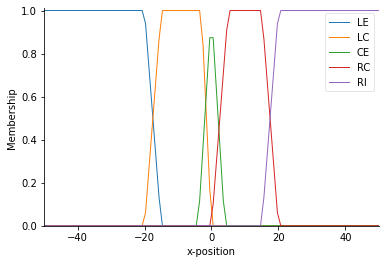

In [24]:
position['LE']= fuzz.trapmf(position.universe,[-50,-50,-20,-15])
position['LC']= fuzz.trapmf(position.universe,[-20,-15,-3,0])
position['CE']=fuzz.trapmf(position.universe,[-4,0,0,4])
position['RC']=fuzz.trapmf(position.universe,[0,5,15,20])
position['RI']=fuzz.trapmf(position.universe,[15,20,50,50])
position.view()

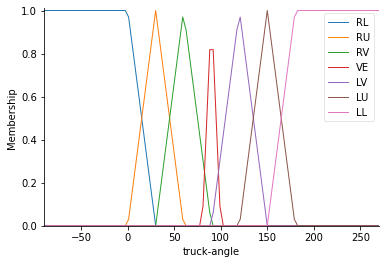

In [25]:
angle['RL']= fuzz.trapmf(angle.universe,[-90,-90,0,30])
angle['RU']= fuzz.trimf(angle.universe,[0,30,60])
angle['RV']=fuzz.trimf(angle.universe,[30,60,90])
angle['VE']=fuzz.trimf(angle.universe,[80,90,100])
angle['LV']=fuzz.trimf(angle.universe,[90,120,150])
angle['LU']=fuzz.trimf(angle.universe,[120,150,180])
angle['LL']=fuzz.trapmf(angle.universe,[150,180,270,270])
angle.view()

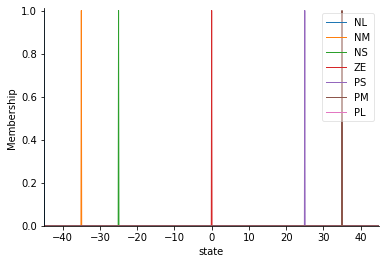

In [26]:
state['NL']= fuzz.trimf(state.universe,[-45.1,-45,-44.9])
state['NM']= fuzz.trimf(state.universe,[-35.1,-35,-34.9])
state['NS']=fuzz.trimf(state.universe,[-25.1,-25,-24.9])
state['ZE']=fuzz.trimf(state.universe,[-0.1,0,0.1])
state['PS']=fuzz.trimf(state.universe,[24.9,25,25.1])
state['PM']=fuzz.trimf(state.universe,[34.9,35,35.1])
state['PL']=fuzz.trimf(state.universe,[44.9,45,45.1])
state.view()

In [27]:
rule0 = ctrl.Rule(antecedent=((position['LE']&angle['RL'])|(position['LC']&angle['RL'])|(position['LE']&angle['RU'])|(position['LC']&angle['RU'])|(position['LE']&angle['RV'])),consequent=state['NL'],label= 'NL')
rule1 = ctrl.Rule(antecedent=((position['LE']&angle['VE'])|(position['LC']&angle['RV'])|(position['CE']&angle['RU'])|(position['CE']&angle['RL'])|(position['RC']&angle['RL'])|(position['LE']&angle['LV'])|(position['LC']&angle['VE'])),consequent=state['NM'],label= 'NM')
rule2 = ctrl.Rule(antecedent=((position['LE']&angle['LU'])|(position['LC']&angle['LV'])|(position['CE']&angle['RV'])|(position['RC']&angle['RU'])|(position['RI']&angle['RL'])),consequent=state['NS'],label= 'NS')
rule3 = ctrl.Rule(antecedent=((position['CE']&angle['VE'])),consequent=state['ZE'],label= 'ZE')
rule4 = ctrl.Rule(antecedent=((position['LE']&angle['LL'])|(position['LC']&angle['LU'])|(position['CE']&angle['LV'])|(position['RC']&angle['RV'])|(position['RI']&angle['RU'])),consequent=state['PS'],label= 'PS')
rule5 = ctrl.Rule(antecedent=((position['LC']&angle['LL'])|(position['CE']&angle['LL'])|(position['CE']&angle['LU'])|(position['RC']&angle['LV'])|(position['RC']&angle['VE'])|(position['RI']&angle['VE'])|(position['RI']&angle['RV'])),consequent=state['PM'],label= 'PM')
rule6 = ctrl.Rule(antecedent=((position['RC']&angle['LL'])|(position['RC']&angle['LU'])|(position['RI']&angle['LV'])|(position['RI']&angle['LU'])|(position['RI']&angle['LL'])),consequent=state['PL'],label= 'PL')
system = ctrl.ControlSystem(rules=[rule0, rule1, rule2,rule3,rule4,rule5,rule6])

<ipython-input-28-cd06bf559b1f>:18: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=-40,cmap='viridis',anpha=0.5)
<ipython-input-28-cd06bf559b1f>:19: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=0,cmap='viridis',anpha=0.5)
<ipython-input-28-cd06bf559b1f>:20: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=-10,cmap='viridis',anpha=0.5)


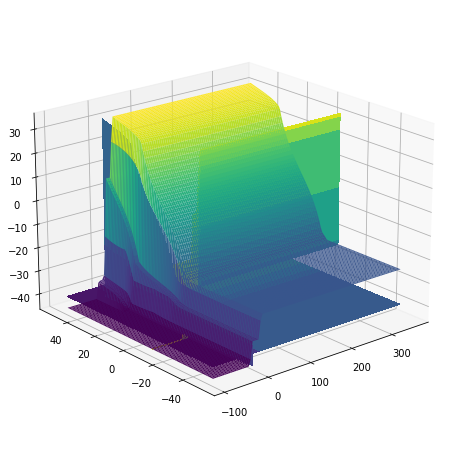

In [28]:
sim = ctrl.ControlSystemSimulation(system,flush_after_run= 100*100+1)
upsampled =  np.linspace(-50,50,100)
upsampled2 = np.linspace(-90,360,100)

x,y = np.meshgrid(upsampled2,upsampled)
z= np.zeros_like(x)

for i in range(100):
  for j in range(100):
    sim.input['x-position']= x[i,j]
    sim.input['truck-angle']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['state']

fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap='viridis',linewidth = 0.4,antialiased= True)
cset = ax.contourf(x,y,z,zdir='z',offset=-40,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=0,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=-10,cmap='viridis',anpha=0.5)
ax.view_init(20,230)